In [1]:
import json
import pandas as pd
from itertools import groupby


import pandas as pd 
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from skimage import io 
import pickle
import seaborn as sns 
from tabulate import tabulate
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from collections import Counter
import math


In [2]:

def plot_datamap(df):
    #df = df.sample(n=25000 if df.shape[0] > 25000 else len(df))
    main_metric = 'variability'
    other_metric = 'confidence'
    
    hue = 'correctness'
    num_hues = len(df[hue].unique().tolist())
    style = 'correctness' if num_hues < 8 else None

#     if not show_hist:
    fig, axs = plt.subplots(1, 1, figsize=(8, 4))
    ax0 = axs
#     else:
#         fig = plt.figure(figsize=(16, 10), )
#         gs = fig.add_gridspec(2, 3, height_ratios=[5, 1])
    
#         ax0 = fig.add_subplot(gs[0, :])
    
    
    ### Make the scatterplot.
    
    # Choose a palette.
    pal = sns.diverging_palette(260, 15, n=num_hues, sep=10, center="dark")
    pal.reverse()

    plot = sns.scatterplot(x=main_metric,
                           y=other_metric,
                           ax=ax0,
                           data=df,
                           hue=hue,
                           palette=pal,
                           style=style,
                           s=30)

In [3]:
train_set = json.load(open('/home/jaspreet/vl-pretraining/snap/vqa/lxr111_multilabel_full_run_3/datamaps_stats.json'))


In [15]:
best_epoch_predictions = []
correct_ids = []
# get the training dynamics in the 18th epoch
for example in train_set:
    if example['Epoch'] == 18:
        best_epoch_predictions.append(example)
print(len(best_epoch_predictions))

for instance in best_epoch_predictions:
    targets = instance['Target'].split(',')
    if instance['Prediction'] in targets:
        correct_ids.append(instance['Question ID'])
print(len(correct_ids))
        

632064
380067


   confidence  variability  correctness  question_id  \
2    0.048267     0.131839         0.20    259733004   
3    0.387907     0.197260         0.50    365999001   
4    0.416278     0.294295         0.70    253915000   
5    0.937955     0.111553         0.90    177160004   
6    0.904424     0.198631         0.95     76608002   

                                         Predictions  \
2  [light, wire, shelf, yes, handle, above, bar, ...   
3                              [2, 4, 1, 6, 3, 5:18]   
4                [5:18, pirate, police, man, casual]   
5                                    [5:18, no, yes]   
6                                [yellow, 10, green]   

                                      Question  \
2        [How does the toilet paper stay dry?]   
3          [How many tennis balls do you see?]   
4                     [What is he dressed as?]   
5               [Does this man have a hat on?]   
6  [What color is the bat the man is holding?]   

                         

/home/jaspreet/.conda/envs/lxmert/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


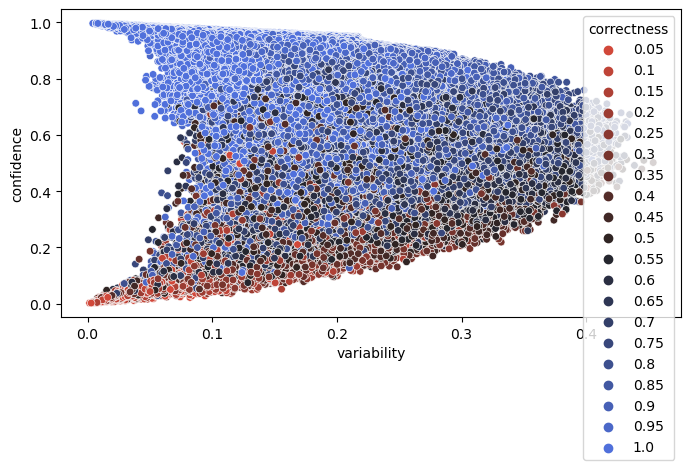

In [19]:
base_path = '../../../../vl-pretraining/snap/vqa/lxr111_multilabel_full_run_3/'
df_metrics = pd.read_pickle(base_path+"datamap_metrics.pkl")

df_full_correct = df_metrics[df_metrics['question_id'].isin(correct_ids)]
print(df_full_correct.head())
print("size of full dataset: ", len(df_metrics))
print("SIZE of correct preds: ", len(df_full_correct))
df_hard = df_full_correct.loc[(df_full_correct['confidence'] >0.98) & (df_full_correct['variability'] < 0.01)]
print("size of correct preds in hard to learn region: ", len(df_hard))
print("QUESTION IDS: ", df_hard['question_id'].tolist())
plot_datamap(df_full_correct)

In [21]:


correct_preds_hard_to_learn = [31941004, 214461013, 288739006, 465430002, 443941004, 447232000, 331724001, 155470003]
correct_preds_easy_to_learn = [149388000, 508855006, 382009003, 484313006, 11567001]
#incorrect_preds_easy_to_learn = [160648000, 401877000, 260637004, 246932001, 404533004]

def calc_instances(question_ids):
    datamap_stats = json.load(open('../../../snap/vqa/lxr111_multilabel_full_run_3/datamaps_stats.json'))
    for ques_id in question_ids:
        instance_metadata = []
        for i in datamap_stats:
            if i['Question ID'] == ques_id:
                instance_metadata.append(i)
        
        json_object = json.dumps(instance_metadata, indent=4)
 
        # Writing to sample.json
        with open(str(ques_id) + ".json", "w") as outfile:
            outfile.write(json_object) 

        with open(str(ques_id) + '.json', encoding='utf-8') as inputfile:
            df = pd.read_json(inputfile)

        df.to_csv(str(ques_id) + '.csv', encoding='utf-8', index=False)

calc_instances(correct_preds_easy_to_learn)

In [15]:
x = json.load(open('../../../data/vqa/train.json'))

example = []
for i in x:
    if i['question_id'] == 458752000:
        example.append(i['label'])
        


In [17]:
y = dict()
for i in x: 
    y[i['question_id']] = i['label']

    
    